In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# %matplotlib notebook
%matplotlib inline

df_myosin = pd.read_csv('myosin.csv',delimiter='\t')
df_area = pd.read_csv('cellarea.csv',delimiter='\t')
df_reg = pd.read_csv('reg.csv',delimiter='\t')


In [14]:
time = df_area['time']

In [15]:
df_myosin.head()

,time,cell0,cell7,cell12,cell17,cell22,cell27,cell32,cell37,cell42,...,cell373,cell376,cell379,cell382,cell385,cell389,cell392,cell396,cell399,cell403
0,0.0,5855.771291,5855.771291,5855.771291,5855.771291,5855.771291,5855.771291,5855.771291,5855.771291,5855.771291,...,5855.771291,5855.771291,5855.771291,5855.771291,5855.771291,5855.771291,5855.771291,5855.771291,5855.771291,5855.771291
1,0.1,5714.964560,5714.964560,5714.964560,5714.964560,5714.964560,5714.964560,5714.964560,5714.964560,5714.964560,...,5714.964489,5714.964489,5714.964489,5714.964489,5714.964489,5714.964489,5714.964489,5714.964489,5714.963962,5714.963962
2,0.2,5577.500741,5577.500741,5577.500741,5577.500741,5577.500741,5577.500741,5577.500741,5577.500741,5577.500741,...,5577.500544,5577.500544,5577.500544,5577.500544,5577.500544,5577.500544,5577.500544,5577.500544,5577.499012,5577.499012
3,0.3,5443.302496,5443.302496,5443.302496,5443.302496,5443.302496,5443.302496,5443.302496,5443.302497,5443.302497,...,5443.302133,5443.302133,5443.302133,5443.302133,5443.302133,5443.302133,5443.302133,5443.302133,5443.299164,5443.299164
4,0.4,5312.294181,5312.294181,5312.294181,5312.294181,5312.294181,5312.294181,5312.294181,5312.294184,5312.294184,...,5312.293623,5312.293623,5312.293623,5312.293623,5312.293624,5312.293624,5312.293624,5312.293624,5312.288830,5312.288830


In [16]:
df_myosin.tail()

,time,cell0,cell7,cell12,cell17,cell22,cell27,cell32,cell37,cell42,...,cell373,cell376,cell379,cell382,cell385,cell389,cell392,cell396,cell399,cell403
55495,5549.5,2563.463831,6167.933510,9469.714759,21194.690321,3154.407507,3190.757608,3441.396450,9796.382351,21163.983820,...,2524.833888,21657.316769,21276.125288,11150.769909,3621.227295,8176.442545,2491.107330,8976.175600,22469.896152,6736.993722
55496,5549.6,2565.182207,6138.686000,9426.480422,21219.727809,3159.829807,3196.362140,3448.124033,9752.294017,21134.178909,...,2523.472302,21630.760045,21300.565182,11103.849126,3628.755678,8201.431567,2490.851535,9003.438444,22486.601924,6757.188640
55497,5549.7,2566.922151,6109.605878,9383.371026,21244.653791,3165.277285,3201.992386,3454.880952,9708.321666,21104.187290,...,2522.139405,21604.008713,21324.890950,11057.006297,3636.316348,8226.496816,2490.620835,9030.774954,22503.158927,6777.456099
55498,5549.8,2568.683645,6080.692983,9340.387630,21269.467668,3170.750011,3207.648420,3461.667311,9664.466434,21074.009476,...,2520.835088,21577.063175,21349.101997,11010.242785,3643.909428,8251.638264,2490.415161,9058.185001,22519.566592,6797.796221
55499,5549.9,2570.466670,6051.947146,9297.531280,21294.168844,3176.248057,3213.330318,3468.483214,9620.729447,21043.645990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
tspan = [0,5549]
center_node = 403
cell = 'cell' + str(center_node)


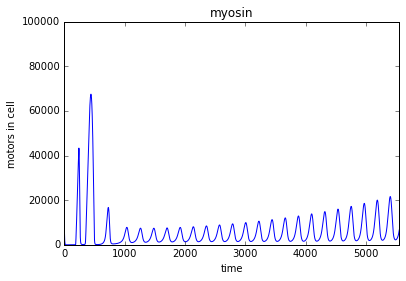

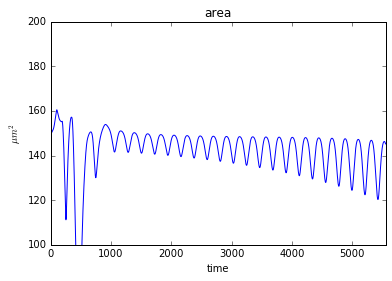

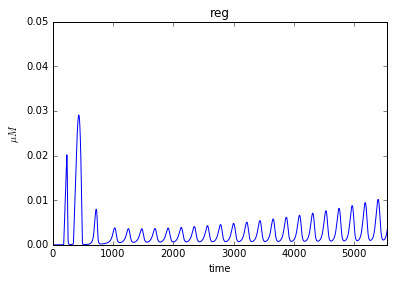

In [25]:
plt.figure(1)
plt.title('myosin')
plt.plot(df_myosin['time'],df_myosin[cell])
plt.xlim(tspan)
plt.ylim([0,100000])
plt.xlabel("time")
plt.ylabel("motors in cell")
plt.show()

plt.figure(2)
plt.title('area')
plt.plot(df_area['time'],df_area[cell])
plt.xlim(tspan)
plt.ylim([100,200])
plt.xlabel("time")
plt.ylabel("$\mu m^2$")
plt.show()

plt.figure(3)
plt.title('reg')
plt.plot(df_reg['time'],df_reg[cell])
plt.xlim(tspan)
plt.ylim([0,0.05])
plt.xlabel("time")
plt.ylabel("$\mu M$")
plt.show()

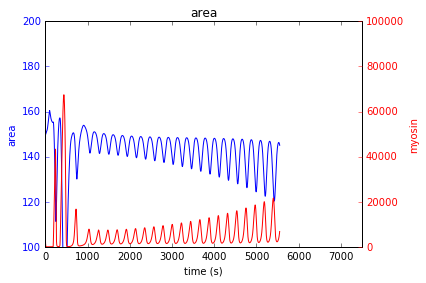

In [26]:
fig, ax1 = plt.subplots()
plt.title('area')
ax1.plot(df_area['time'],df_area[cell],'b-')
ax1.set_xlabel('time (s)')
ax1.set_xlim([0,7500])
ax1.set_ylim([100,200])
ax1.set_ylabel('area', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df_myosin['time'],df_myosin[cell],'r-')
ax2.set_xlim([0,7500])
ax2.set_ylim([0,100000])
ax2.set_ylabel('myosin', color='r')
ax2.tick_params('y', colors='r')
fig.tight_layout()
plt.show()

In [27]:
area = df_area[cell]
myosin = df_myosin[cell]

In [28]:
# Convert number of molecules to a concentration
# mols = Number of molecules
# cell_vol = volume in micro-meters^3
# N_A = 6.022*10^23 (Avogadro's Number)
# Returns concentration in Molar

def mol2conc(mols, cell_vol, N_A):
    conc = mols*10**(3)*10**(12)*(1/N_A)*(1/cell_vol)     
    return conc

# Convert a concentration to number of molecules
# IC = concentration (in Molar)
# cell_vol = volume in micro-meters^3
# N_A = 6.022*10^23 (Avogadro's Number)
# Returns number of molecules

def conc2mol(IC, cell_vol, N_A):
    Mol = IC*10**(-3)*10**(-12)*N_A*cell_vol
    return Mol

In [29]:
Na = 6.022*10**23

In [30]:
myo_conc = mol2conc(myosin,area*5,Na)

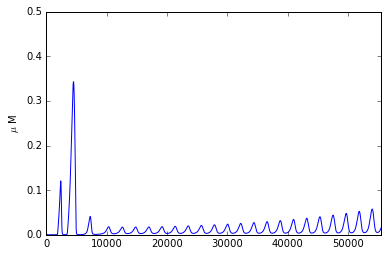

In [31]:
plt.plot(myo_conc*10**6)
plt.xlim([tspan[0],tspan[1]*10])
plt.ylim([0,0.5])
plt.ylabel('$\mu$ M')